DATASET INFORMATION

Contains 3 classes of 50 articles each where each class is an iris plant sample. The total sample stands at 150.

Basic information:
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width

To do:
ML classifier on the basis of physical attriutes

# MODULE IMPORT


In [3]:
import sklearn
import numpy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT THE DATASET


In [4]:
!pip install scikit-learn==1.3.0

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/vsgopi7/classification-of-iris-flower-using-python-tensorflow-and-scikit-learn/main/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Printing the first 5 rows:

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Displaying the basic stats of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#samples in each class
df['sepal_length'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

# DATA PREPROCESSING


In [9]:
#We shall see if there are null values in order to remove them and make it more optimized
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# BASIC DATA ANALYSIS

We will make histograms for the samples in order to find irregularities

<Axes: >

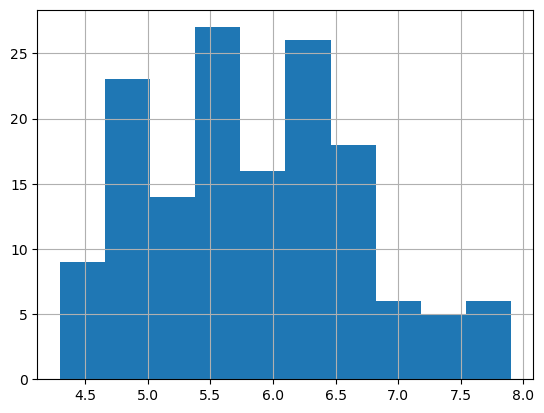

In [10]:
df['sepal_length'].hist()

In [11]:
#we can see a continuous rise and fall so this data will be easy to deal with

<Axes: >

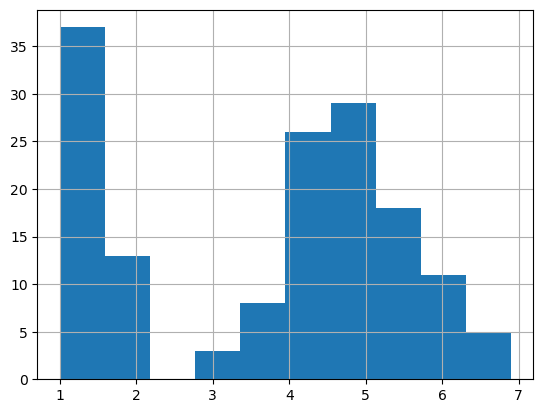

In [12]:
df['petal_length'].hist()

In [13]:
#We see a sudden break in the histogram which can be difficult to handle

<Axes: >

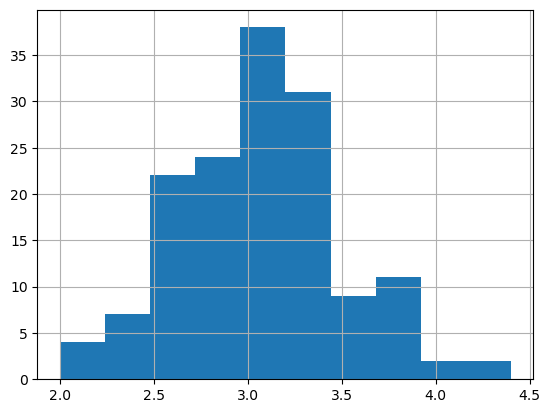

In [14]:
df['sepal_width'].hist()

In [15]:
#A good continuous rise and fall is observed

<Axes: >

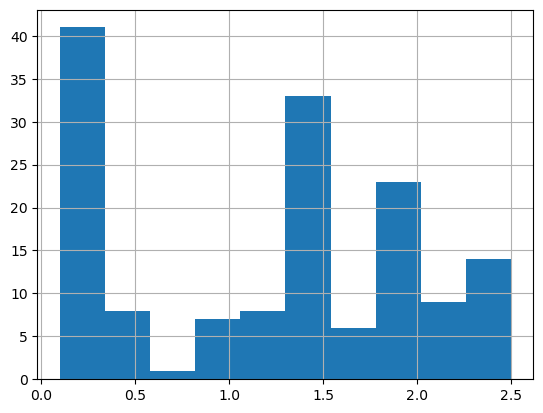

In [16]:
df['petal_width'].hist()

In [17]:
#Sharp dip is observed

creating list of colours and class labels

In [18]:
colors = ['red', 'blue', 'green']
species = ['virginica', 'versicolor', 'setosa']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Unique Species in DataFrame:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Species: virginica, Data Points: 0
Species: versicolor, Data Points: 0
Species: setosa, Data Points: 0


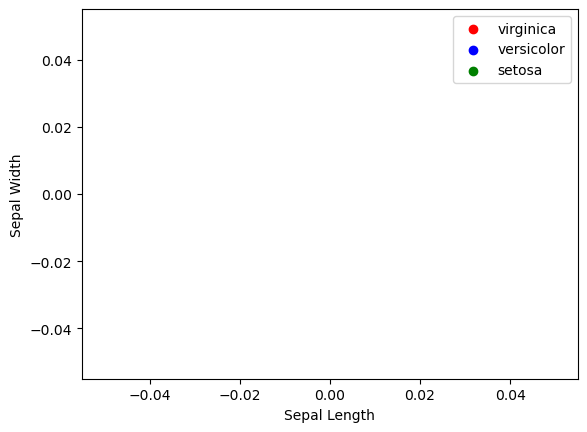

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df, species, and colors are defined somewhere in your code

print("DataFrame Info:")
print(df.info())  # Check DataFrame information
print()

print("Unique Species in DataFrame:")
print(df['species'].unique())  # Check unique species in DataFrame
print()

for i in range(3):
    x = df[df['species'] == species[i]]
    print(f"Species: {species[i]}, Data Points: {len(x)}")  # Check number of data points for each species
    # Using scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.show()  # Display the plot


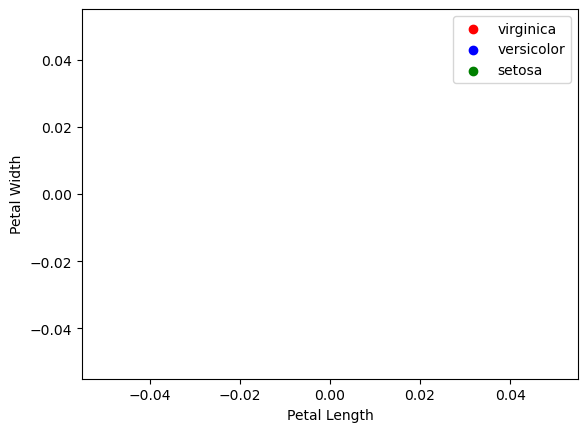

In [39]:
#Filtering data from each class
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
   



Now we will use correlation matrix to identify similar patterns and let our model take decision

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17544\3326152365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


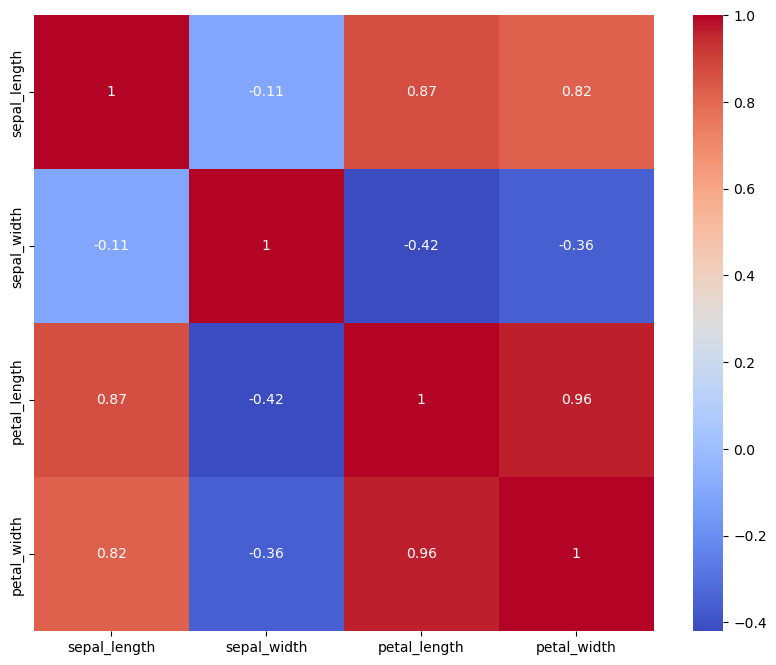

In [45]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

plt.show()


# MODEL TRAINING AND TESTING


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have X_train, Y_train, X_test, and Y_test defined somewhere above




In [4]:
!pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 130.2/130.2 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 23.6 MB/s eta 0:00:00
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ------------------------------------- 938.6/938.6 kB 19.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 23.7 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ------------------------------------- 442.0/442.0 kB 13.9 MB/s eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 13.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18





Training Progress:
------------------------------------
Epoch 1/10


5/5 [==============================] - 3s 138ms/step - loss: 0.7031 - accuracy: 0.4500 - val_loss: 0.7268 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.6964 - accuracy: 0.5125 - val_loss: 0.7119 - val_accuracy: 0.3500
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6909 - accuracy: 0.5625 - val_loss: 0.7043 - val_accuracy: 0.5500
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.6887 - accuracy: 0.5750 - val_loss: 0.6990 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 0.6858 - accuracy: 0.5500 - val_loss: 0.6976 - val_accuracy: 0.5500
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.6841 - accuracy: 0.5500 - val_loss: 0.6959 - val_accuracy: 0.5500
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.6828 - accuracy: 0.5750 - val_

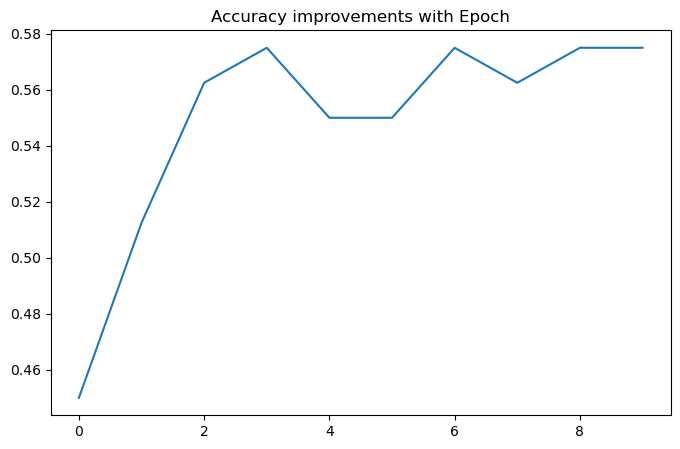

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate placeholder data for demonstration purposes
# Replace these with your actual training and testing data
X_train = np.random.rand(100, 10)
Y_train = np.random.randint(0, 2, size=(100,))
X_test = np.random.rand(20, 10)
Y_test = np.random.randint(0, 2, size=(20,))

# Define your model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Make it verbose so we can see the progress
VERBOSE = 1

# Setup Hyper Parameters for training
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n------------------------------------")

# Fit the model
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")

# Plot accuracy of the model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# Evaluate the model


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)


In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ",model.score(x_test, y_test)*100)



Logistic Regression Accuracy:  95.55555555555556


In [27]:
model.fit(x_train.values, y_train.values)


LogisticRegression()

In [28]:
print("accuracy: ", model.score(x_test,y_test)*100)

accuracy:  95.55555555555556


C:\Users\KIIT\Downloads\anaconda\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [30]:
#K-nearest neighbours
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbours accuracy: ",model.score(x_test, y_test)*100)


K-nearest neighbours accuracy:  93.33333333333333


C:\Users\KIIT\Downloads\anaconda\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [31]:
model.fit(x_train.values, y_train.values)


KNeighborsClassifier()

In [32]:
#printing the metric to get the performance
print("accuracy: ", model.score(x_test,y_test)*100)


accuracy:  93.33333333333333


C:\Users\KIIT\Downloads\anaconda\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [33]:
#decision tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision tree accuracy: ", model.score(x_test,y_test)*100)

Decision tree accuracy:  95.55555555555556


C:\Users\KIIT\Downloads\anaconda\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [34]:
model.fit(x_train.values, y_train.values)


DecisionTreeClassifier()

In [35]:
print("accuracy: ", model.score(x_test,y_test)*100)

accuracy:  95.55555555555556


C:\Users\KIIT\Downloads\anaconda\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
